In [1]:
using MutSim
using Plots

## Cancer short term

In [11]:
# Parameters for the simulation
grid_size = 100  # Size of the grid
steps = 365 # Number of iterations
normal_mutation_rate = 1e-10  # Chance of a normal cell mutating into a tumor cell
cancer_mutation_rate = 1e-6
genome_size = 3.185e+9
takeover_probability = 0.05  # Base probability of a tumor taking over a normal cell
death_rate = 1/28  # Death rate for normal cells
mutation_per_bp = (10^1)/1e+6

1.0e-5

In [16]:
grids, mutation_profiles = simulate_cancer(grid_size, steps, normal_mutation_rate, cancer_mutation_rate,
                                           genome_size, takeover_probability, death_rate, mutation_per_bp, 50)

([[1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 0 1; 1 1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 0 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [0 1 … 1 1; 1 1 … 1 1; … ; 0 1 … 1 1; 1 1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 0 … 1 1; 1 1 … 0 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1]  …  [1 1 … 1 1; 1 1 … 0 1; … ; 1 1 … 1 1; 1 1 … 0 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 0 … 1 1; 0 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 0], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 0 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 1 … 1 1; 1 0 … 1 1; … ; 1 1 … 1 1; 1 1 … 1

In [17]:
any(grids[end] .== 2)

true

┌ Info: Saved animation to /Users/wl61/github/MutSim/results/cancer_sim/cancer_sim.gif
└ @ Plots /Users/wl61/.julia/packages/Plots/ju9dp/src/animation.jl:156


Plots.AnimatedGif("/Users/wl61/github/MutSim/results/cancer_sim/cancer_sim.gif")
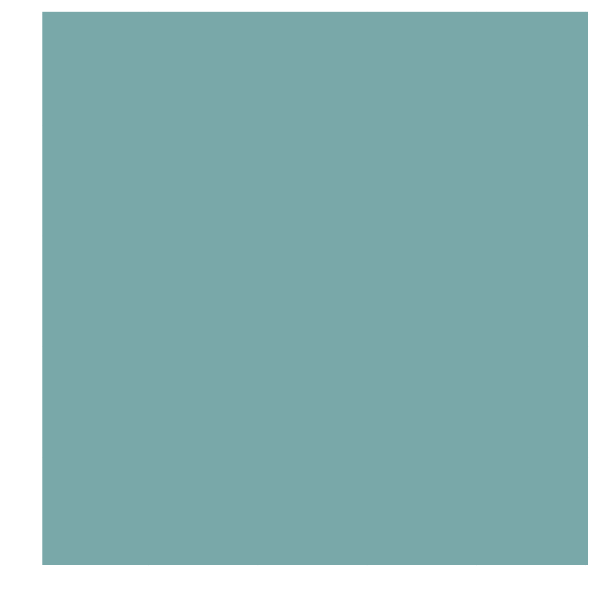

In [18]:
create_animation(grids, "../results/cancer_sim/cancer_sim.gif", 20)

In [19]:
n_mut_freq = get_mutation_frequency(mutation_profiles)
num_mut = collect(keys(n_mut_freq))
freq = collect(values(n_mut_freq))

257-element Vector{Any}:
     410
   92985
  495980
  968153
 2126192
 2325243
  625238
  685713
      57
  514020
       ⋮
       2
       2
       1
       2
       1
       3
       9
       1
      20

In [20]:
plot(bar(num_mut./maximum(num_mut), freq ./ sum(freq)), legend=false, dpi=300)
title!("Normal and Cancer cells")
xlabel!("SFS")
ylabel!("Relative mutation number")
savefig("../results/cancer_sim/cancer_cell.png")

"/Users/wl61/github/MutSim/results/cancer_sim/cancer_cell.png"

In [21]:
plot(bar(num_mut, freq), legend=false, dpi=300)
title!("Normal and Cancer cells")
xlabel!("SFS")
ylabel!("# mutation number")
savefig("../results/cancer_sim/cancer_cell_actual.png")

"/Users/wl61/github/MutSim/results/cancer_sim/cancer_cell_actual.png"

In [22]:
grid_mat = copy(grids[end])
normal_mutation_profile = []
cancer_mutation_profile = []

for x in 1:grid_size
    for y in 1:grid_size
        mat_index = (x-1)*grid_size + y

        if grid_mat[x, y] == 1
            push!(normal_mutation_profile, mutation_profiles[mat_index])
        elseif grid_mat[x, y] == 2
            push!(cancer_mutation_profile, mutation_profiles[mat_index])
        end
    end
end

In [23]:
length(cancer_mutation_profile)

687

In [24]:
n_mut_freq = get_mutation_frequency(normal_mutation_profile)
num_mut = collect(keys(n_mut_freq))
freq = collect(values(n_mut_freq))

plot(bar(num_mut./maximum(num_mut), freq ./ sum(freq)), legend=false, dpi=300)
title!("Normal cells")
xlabel!("SFS")
ylabel!("Relative mutation number")
savefig("../results/cancer_sim/normal_cell_only.png")

plot(bar(num_mut, freq), legend=false, dpi=300)
title!("Normal cells")
xlabel!("SFS")
ylabel!("# mutation number")
savefig("../results/cancer_sim/normal_cell_only_actual.png")

"/Users/wl61/github/MutSim/results/cancer_sim/normal_cell_only_actual.png"

In [25]:
n_mut_freq = get_mutation_frequency(cancer_mutation_profile)
num_mut = collect(keys(n_mut_freq))
freq = collect(values(n_mut_freq))

plot(bar(num_mut./maximum(num_mut), freq ./ sum(freq)), legend=false, dpi=300)
title!("Cancer cells")
xlabel!("SFS")
ylabel!("Relative mutation number")
savefig("../results/cancer_sim/cancer_cell_only.png")

plot(bar(num_mut, freq), legend=false, dpi=300)
title!("Cancer cells")
xlabel!("SFS")
ylabel!("# mutation number")
savefig("../results/cancer_sim/cancer_cell_only_actual.png")

"/Users/wl61/github/MutSim/results/cancer_sim/cancer_cell_only_actual.png"

In [26]:
heatmap(grids[1], c=cgrad(["#d8e9ef", "#79a8a9", "#fc9d9a"], categorical=true), clim=(0, 2), size=(600, 600), axis=false, legend=false)
title!("t=1 (days)")
savefig("../results/cancer_sim/day1_cancer_grid_view.png")

"/Users/wl61/github/MutSim/results/cancer_sim/day1_cancer_grid_view.png"

In [27]:
heatmap(grids[150], c=cgrad(["#d8e9ef", "#79a8a9", "#fc9d9a"], categorical=true), clim=(0, 2), size=(600, 600), axis=false, legend=false)
title!("t=150 (days)")
savefig("../results/cancer_sim/day150_cancer_grid_view.png")

"/Users/wl61/github/MutSim/results/cancer_sim/day150_cancer_grid_view.png"

In [28]:
heatmap(grids[end], c=cgrad(["#d8e9ef", "#79a8a9", "#fc9d9a"], categorical=true), clim=(0, 2), size=(600, 600), axis=false, legend=false)
title!("t=365 (days)")
savefig("../results/cancer_sim/day365_cancer_grid_view.png")

"/Users/wl61/github/MutSim/results/cancer_sim/day365_cancer_grid_view.png"